In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/Users/ivanpakhomov/Desktop/final_data.csv', index_col = 'Unnamed: 0')

In [5]:
df

,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объём двигателя,Цвет,Марка,Класс,Налог
0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,Kia,4,14443
1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,Kia,3,13130
2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,автомат,2.4,чёрный,Tesla,5,0
3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый,LADA,2,2825
4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый,McLaren,5,344250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,Hyundai Sonata VIII (DN8),2949000,2020,49538,передний,183,Бензин,седан,автомат,1.6,белый,Hyundai,3,9150
2554,Kia Rio II Рестайлинг,379000,2009,175645,передний,97,Бензин,хэтчбек 5 дв.,механика,1.4,серый,Kia,1,1164
2555,Toyota Venza I Рестайлинг,1849000,2013,131320,полный,185,Бензин,внедорожник 5 дв.,автомат,2.7,коричневый,Toyota,3,9250
2556,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный,Lexus,3,17850


In [103]:
index_outlier = df[df['Цена'] == df['Цена'].max()].index
df.drop(index_outlier, inplace=True)

In [104]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

In [105]:
df_scaled_numeric =  (df_num - df_num. min ())/ (df_num. max () - df_num. min ())

In [106]:
df_scaled_numeric

,Цена,Год выпуска,Пробег,ЛС,Объём двигателя,Класс,Налог
0,0.072997,0.951613,0.043332,0.161026,0.245902,0.75,0.041955
1,0.041716,0.919355,0.071665,0.161026,0.245902,0.50,0.038141
2,0.259857,0.983871,0.000115,1.000000,0.278689,1.00,0.000000
3,0.021720,0.967742,0.014998,0.069744,0.147541,0.25,0.008206
4,1.000000,0.967742,0.002183,0.738462,0.540984,1.00,1.000000
...,...,...,...,...,...,...,...
2553,0.048948,0.951613,0.082562,0.141538,0.147541,0.50,0.026580
2554,0.005726,0.774194,0.292740,0.053333,0.114754,0.00,0.003381
2555,0.030448,0.838710,0.218865,0.143590,0.327869,0.50,0.026870
2556,0.045735,0.870968,0.155350,0.197949,0.213115,0.50,0.051852


In [107]:
df_cat = df.select_dtypes(include='object')

In [108]:
df_cat

,Модель,Привод,Тип двигателя,Тип кузова,Коробка передач,Цвет,Марка
0,Kia Carnival IV,передний,Дизель,минивэн,автомат,чёрный,Kia
1,Kia Carnival III,передний,Дизель,минивэн,автомат,чёрный,Kia
2,Tesla Model X Plaid I Рестайлинг,полный,Электро,внедорожник 5 дв.,автомат,чёрный,Tesla
3,LADA (ВАЗ) Vesta I,передний,Бензин,седан,вариатор,белый,LADA
4,McLaren 765LT,задний,Бензин,купе,робот,фиолетовый,McLaren
...,...,...,...,...,...,...,...
2553,Hyundai Sonata VIII (DN8),передний,Бензин,седан,автомат,белый,Hyundai
2554,Kia Rio II Рестайлинг,передний,Бензин,хэтчбек 5 дв.,механика,серый,Kia
2555,Toyota Venza I Рестайлинг,полный,Бензин,внедорожник 5 дв.,автомат,коричневый,Toyota
2556,Lexus NX 200t I,полный,Бензин,внедорожник 5 дв.,автомат,красный,Lexus


In [109]:
df_cat_scaled = pd.get_dummies(df_cat)

In [110]:
df_cat_scaled

,Модель_Acura MDX II,Модель_Aston Martin DB9 I Рестайлинг 2,Модель_Audi 80 V (B4),Модель_Audi A3 35 TFSI IV (8Y),Модель_Audi A3 II (8P) Рестайлинг 2,Модель_Audi A3 III (8V) Рестайлинг,Модель_Audi A4 35 TFSI V (B9) Рестайлинг,Модель_Audi A4 45 TFSI V (B9) Рестайлинг,Модель_Audi A4 II (B6),Модель_Audi A4 III (B7),...,Марка_SsangYong,Марка_Subaru,Марка_Suzuki,Марка_Tesla,Марка_Toyota,Марка_Volkswagen,Марка_Volvo,Марка_Zeekr,Марка_ГАЗ,Марка_УАЗ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_scaled = pd.concat([df_scaled_numeric, df_cat_scaled], axis=1)

In [112]:
df_scaled

,Цена,Год выпуска,Пробег,ЛС,Объём двигателя,Класс,Налог,Модель_Acura MDX II,Модель_Aston Martin DB9 I Рестайлинг 2,Модель_Audi 80 V (B4),...,Марка_SsangYong,Марка_Subaru,Марка_Suzuki,Марка_Tesla,Марка_Toyota,Марка_Volkswagen,Марка_Volvo,Марка_Zeekr,Марка_ГАЗ,Марка_УАЗ
0,0.072997,0.951613,0.043332,0.161026,0.245902,0.75,0.041955,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.041716,0.919355,0.071665,0.161026,0.245902,0.50,0.038141,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.259857,0.983871,0.000115,1.000000,0.278689,1.00,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.021720,0.967742,0.014998,0.069744,0.147541,0.25,0.008206,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,0.967742,0.002183,0.738462,0.540984,1.00,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,0.048948,0.951613,0.082562,0.141538,0.147541,0.50,0.026580,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2554,0.005726,0.774194,0.292740,0.053333,0.114754,0.00,0.003381,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2555,0.030448,0.838710,0.218865,0.143590,0.327869,0.50,0.026870,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2556,0.045735,0.870968,0.155350,0.197949,0.213115,0.50,0.051852,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df_train, df_test = train_test_split(df_scaled, test_size = 0.3, random_state=227)
y_train = df_train['Цена'].to_numpy()
y_test = df_test['Цена'].to_numpy()
X_train = df_train.drop('Цена', axis=1)
X_test = df_test.drop('Цена', axis=1)

In [144]:
model = LinearRegression()

In [145]:
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [146]:
print('Ошибка MSE на тренировочной выборке', mean_squared_error(y_train, y_train_pred))
print('Ошибка MSE на тестовой выборке', mean_squared_error(y_test, y_test_pred))
print('Ошибка MAE на тренировочной выборке', mean_absolute_error(y_train, y_train_pred))
print('Ошибка MAE на тестовой выборке', mean_absolute_error(y_test, y_test_pred))

Ошибка MSE на тренировочной выборке 0.00019600182556378352
Ошибка MSE на тестовой выборке 4.4242657742336856e+21
Ошибка MAE на тренировочной выборке 0.005586111412621194
Ошибка MAE на тестовой выборке 17777182989.651356


In [149]:
for col, coef in zip(X_train.columns, model.coef_):
    print(f'Признак {col} имеет вес {coef}')

Признак Год выпуска имеет вес 0.24301081359508736
Признак Пробег имеет вес -0.03082525756875553
Признак ЛС имеет вес -0.17090927703646325
Признак Объём двигателя имеет вес 0.022154726749337064
Признак Класс имеет вес 0.021234327020132476
Признак Налог имеет вес 0.2648876554629872
Признак Модель_Acura MDX II имеет вес -450933679854.4347
Признак Модель_Aston Martin DB9 I Рестайлинг 2 имеет вес -162932964299.16156
Признак Модель_Audi 80 V (B4) имеет вес -71871822199.81621
Признак Модель_Audi A3 35 TFSI IV (8Y) имеет вес -71871822199.88559
Признак Модель_Audi A3 II (8P) Рестайлинг 2 имеет вес 529571495999.5007
Признак Модель_Audi A3 III (8V) Рестайлинг имеет вес -71871822199.90923
Признак Модель_Audi A4 35 TFSI V (B9) Рестайлинг имеет вес -474274615640.8139
Признак Модель_Audi A4 45 TFSI V (B9) Рестайлинг имеет вес 559152240482.0193
Признак Модель_Audi A4 II (B6) имеет вес -71871822199.84535
Признак Модель_Audi A4 III (B7) имеет вес -71871822199.86172
Признак Модель_Audi A4 V (B9) имеет ве

Можно заметить, что на тренировочной выборке ошибка очень маленькая, а на тестовой наоборот. Это значит, что модель переобучилась. Это могло произойти из-за большого числа признаков. Это можно исправить, добавив регуляризацию в модель, что должно наказывать за большие веса и повысить качество модели. Далее мы попробуем Ridge и Lasso регрессию, сравним качество и выберем лучшую модель.

In [176]:
model_ridge = Ridge(alpha=10)

model_ridge.fit(X_train, y_train)

y_train_pred = model_ridge.predict(X_train)
y_test_pred = model_ridge.predict(X_test)

In [177]:
print('Ошибка MSE на тренировочной выборке', mean_squared_error(y_train, y_train_pred))
print('Ошибка MSE на тестовой выборке', mean_squared_error(y_test, y_test_pred))
print('Ошибка MAE на тренировочной выборке', mean_absolute_error(y_train, y_train_pred))
print('Ошибка MAE на тестовой выборке', mean_absolute_error(y_test, y_test_pred))

Ошибка MSE на тренировочной выборке 0.001334509442706093
Ошибка MSE на тестовой выборке 0.0011593390327555547
Ошибка MAE на тренировочной выборке 0.017023876710889316
Ошибка MAE на тестовой выборке 0.018070224722061157


In [121]:
for col, coef in zip(X_train.columns, model_ridge.coef_):
    print(f'Признак {col} имеет вес {coef}')

Признак Год выпуска имеет вес 0.13048289646546693
Признак Пробег имеет вес -0.031978601944315725
Признак ЛС имеет вес -0.008931237960571232
Признак Объём двигателя имеет вес -0.034067167289925177
Признак Класс имеет вес 0.03390477191150595
Признак Налог имеет вес 0.3182836059923706
Признак Модель_Acura MDX II имеет вес -0.007449986204477854
Признак Модель_Aston Martin DB9 I Рестайлинг 2 имеет вес 0.01479698298199299
Признак Модель_Audi 80 V (B4) имеет вес 0.04300853581005365
Признак Модель_Audi A3 35 TFSI IV (8Y) имеет вес 0.0053489151567065385
Признак Модель_Audi A3 II (8P) Рестайлинг 2 имеет вес 0.0
Признак Модель_Audi A3 III (8V) Рестайлинг имеет вес -0.01131977791015329
Признак Модель_Audi A4 35 TFSI V (B9) Рестайлинг имеет вес 0.0
Признак Модель_Audi A4 45 TFSI V (B9) Рестайлинг имеет вес 0.0
Признак Модель_Audi A4 II (B6) имеет вес 0.023459460278211244
Признак Модель_Audi A4 III (B7) имеет вес 0.00872280514050052
Признак Модель_Audi A4 V (B9) имеет вес -0.009092982046775618
Призн

In [137]:
model_lasso = Lasso(alpha=10)

model_lasso.fit(X_train, y_train)

y_train_pred = model_lasso.predict(X_train)
y_test_pred = model_lasso.predict(X_test)

In [138]:
print('Ошибка на тренировочной выборке', mean_absolute_error(y_train, y_train_pred))

Ошибка на тренировочной выборке 0.05721925616198641


In [139]:
print('Ошибка на тестовой выборке', mean_absolute_error(y_test, y_test_pred))

Ошибка на тестовой выборке 0.053098379968891295


In [134]:
for col, coef in zip(X_train.columns, model_lasso.coef_):
    print(f'Признак {col} имеет вес {coef}')

Признак Год выпуска имеет вес 0.0
Признак Пробег имеет вес -0.0
Признак ЛС имеет вес 0.0
Признак Объём двигателя имеет вес 0.0
Признак Класс имеет вес 0.0
Признак Налог имеет вес 0.0
Признак Модель_Acura MDX II имеет вес -0.0
Признак Модель_Aston Martin DB9 I Рестайлинг 2 имеет вес 0.0
Признак Модель_Audi 80 V (B4) имеет вес -0.0
Признак Модель_Audi A3 35 TFSI IV (8Y) имеет вес -0.0
Признак Модель_Audi A3 II (8P) Рестайлинг 2 имеет вес 0.0
Признак Модель_Audi A3 III (8V) Рестайлинг имеет вес -0.0
Признак Модель_Audi A4 35 TFSI V (B9) Рестайлинг имеет вес 0.0
Признак Модель_Audi A4 45 TFSI V (B9) Рестайлинг имеет вес 0.0
Признак Модель_Audi A4 II (B6) имеет вес -0.0
Признак Модель_Audi A4 III (B7) имеет вес -0.0
Признак Модель_Audi A4 V (B9) имеет вес -0.0
Признак Модель_Audi A5 45 TFSI II (F5) Рестайлинг имеет вес 0.0
Признак Модель_Audi A5 I (8T) имеет вес -0.0
Признак Модель_Audi A5 I (8T) Рестайлинг имеет вес -0.0
Признак Модель_Audi A5 II (F5) имеет вес 0.0
Признак Модель_Audi A6 4

In [135]:
alphas_list = np.array([0.1, 1, 10, 100, 200])
coefs1 = []
coefs2 = []
for a in alphas_list: 
    model_r = Ridge(alpha=a)
    model_r.fit(X_train, y_train)
    coefs1.append(np.linalg.norm(model_r.coef_))

for a in alphas_list: 
    model_l = Lasso(alpha=a)
    model_l.fit(X_train, y_train)
    coefs2.append(np.linalg.norm(model_l.coef_))

Норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

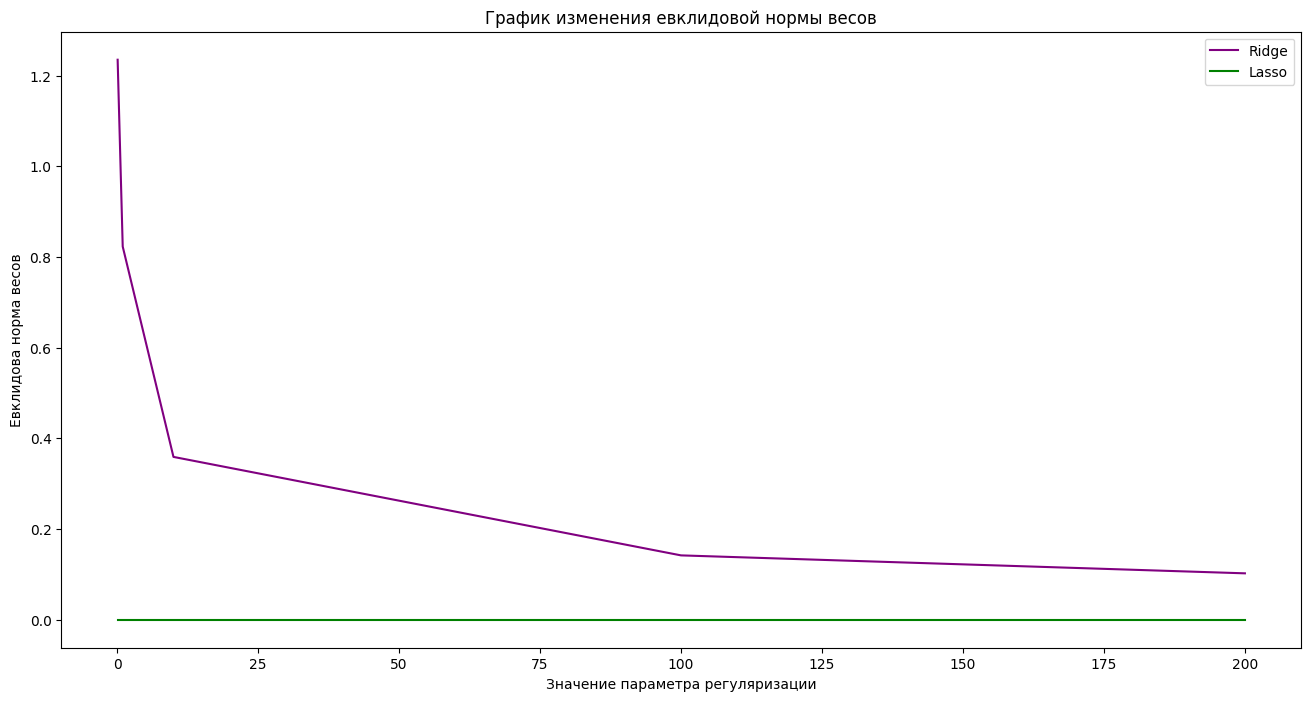

In [136]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(alphas_list, coefs1, label='Ridge', color='purple')
ax.plot(alphas_list, coefs2, label='Lasso', color='green')
plt.xlabel('Значение параметра регуляризации')
plt.ylabel('Евклидова норма весов') 
plt.title('График изменения евклидовой нормы весов')
plt.legend();

Мы выяснили, что лучше всего использовать Ridge-регрессию, так как Lasso зануляет очень важные для нас признаки. С помощью кросс-валидации давайте подберем лучшие значения параметра регуляризации и выберем лучшую модель. 

In [170]:
alphas_list = np.array([0.01, 0.1, 1, 10, 100, 200])

In [171]:
model_cv = RidgeCV(alphas=alphas_list, cv=5)
model_cv.fit(X_train, y_train)

y_train_pred = model_cv.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)

alpha_hat = model_cv.alpha_

In [172]:
alpha_hat

0.1

In [173]:
model_final = Ridge(alpha = alpha_hat)

coefs_final = model_final.fit(X_train, y_train).coef_

In [174]:
print('Ошибка MSE на тренировочной выборке', mean_squared_error(y_train, y_train_pred))
print('Ошибка MSE на тестовой выборке', mean_squared_error(y_test, y_test_pred))
print('Ошибка MAE на тренировочной выборке', mean_absolute_error(y_train, y_train_pred))
print('Ошибка MAE на тестовой выборке', mean_absolute_error(y_test, y_test_pred))

Ошибка MSE на тренировочной выборке 0.00021029716391089142
Ошибка MSE на тестовой выборке 0.0007016467910095603
Ошибка MAE на тренировочной выборке 0.005954733960407274
Ошибка MAE на тестовой выборке 0.01379609282967601


In [175]:
for col, coef in zip(X_train.columns, model_final.coef_):
    print(f'Признак {col} имеет вес {coef}')

Признак Год выпуска имеет вес 0.13048289646546693
Признак Пробег имеет вес -0.031978601944315725
Признак ЛС имеет вес -0.008931237960571232
Признак Объём двигателя имеет вес -0.034067167289925177
Признак Класс имеет вес 0.03390477191150595
Признак Налог имеет вес 0.3182836059923706
Признак Модель_Acura MDX II имеет вес -0.007449986204477854
Признак Модель_Aston Martin DB9 I Рестайлинг 2 имеет вес 0.01479698298199299
Признак Модель_Audi 80 V (B4) имеет вес 0.04300853581005365
Признак Модель_Audi A3 35 TFSI IV (8Y) имеет вес 0.0053489151567065385
Признак Модель_Audi A3 II (8P) Рестайлинг 2 имеет вес 0.0
Признак Модель_Audi A3 III (8V) Рестайлинг имеет вес -0.01131977791015329
Признак Модель_Audi A4 35 TFSI V (B9) Рестайлинг имеет вес 0.0
Признак Модель_Audi A4 45 TFSI V (B9) Рестайлинг имеет вес 0.0
Признак Модель_Audi A4 II (B6) имеет вес 0.023459460278211244
Признак Модель_Audi A4 III (B7) имеет вес 0.00872280514050052
Признак Модель_Audi A4 V (B9) имеет вес -0.009092982046775618
Призн

Самые большие веса имеют признаки налог и год выпуска, они сильнее всего влияют на цену, что достаточно логично. Мы видим, что пробег отрицательно связан с ценой, ведь чем больше пробег, тем ниже должна быть цена. В целом, у нас получилась адекватная модель с хорошим качеством на тестовой выборке.